<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/EMNIST_balanced_Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd


In [14]:
train_df = pd.read_csv('emnist-balanced-train.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]
label_map = pd.read_csv("mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

Ejemplo.

Label entry 42: N


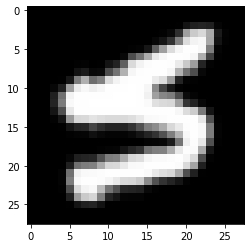

In [18]:
import matplotlib.pyplot as plt

sample_image = X_train.iloc[42]
sample_label = y_train.iloc[42]
sample_image.shape, sample_label
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

In [19]:
X_train = X_train.astype('float32') / 255

In [26]:
X_train.shape
import numpy as np
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)

    return image
X_train = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
X_train = X_train.reshape(-1, 28, 28, 1)


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [4]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [5]:
from keras import layers
from keras import models
convNN = models.Sequential()

In [6]:
convNN.add(layers.Conv2D(filters     =64, 
                         kernel_size =(3, 3), 
                         activation  ='relu', 
                         input_shape =(28, 28, 1)))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=2, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=2, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=2, activation='relu'))
convNN.add(layers.Conv2D(filters=32, kernel_size=2, activation='relu'))
convNN.add(layers.Conv2D(filters=10, kernel_size=2, activation='relu'))



In [7]:
convNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        9

In [8]:
keras.layers.Flatten(data_format=None)
convNN.add(layers.Flatten())

In [9]:
convNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        9

In [10]:
convNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
import time
tic = time.time()

convNN.fit(x = train_images, 
           y = train_labels, 
           epochs    =5,
           batch_size=64,
           verbose=2)

print('seconds=', time.time()-tic)

Epoch 1/5


KeyboardInterrupt: ignored